<a href="https://colab.research.google.com/github/kaizen-abhinav/PDECODE-APPLICATIONCHALLENGES/blob/main/ApplicationChallenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application Challenge: Heat Dissipation in a Longer Rod
Now, let’s apply what you’ve learned to a new set of physical parameters. This exercise simulates heat dissipation in a longer structural beam with a more intense initial heat source.

Your Task

Simulate the 1D heat equation on a rod with the following new conditions:

Rod Length (L): 3.2 meters
Initial Condition: The temperature is 0°C everywhere except for a single point at the very center, which has an intense initial temperature of 300°C.
Boundary Conditions: The ends of the rod are maintained at 0°C (Dirichlet BC).
Material: Assume the same thermal diffusivity,
.
Simulation Time (T): Run the simulation for a longer time, T = 2.0 seconds, to observe more significant diffusion.
The Challenge

Copy the Python code from the previous example.
Modify the parameter values (L, T, and the initial temperature pulse).
Crucially, after changing L and T, you must re-calculate the stability parameter r. If r > 0.5, the simulation will fail! You will need to adjust either nx (number of space points) or nt (number of time steps) to bring r back into the stable region (
). The goal is to find a stable combination.
Hint: The stability parameter is

.

If your r value is too high, you have two options to decrease it:
Increase nt: This makes the time step Δt smaller, which is the most direct way to lower r.
Decrease nx: This makes the space step Δx larger. While this also works, it reduces the spatial resolution of your simulation.
Try increasing nt first. A good starting point would be to double it until r is stable.

Solution to the Application Challenge

Here is the complete Python code implementing the solution for the new parameters. The key is adjusting nt to ensure stability.

--- Challenge Parameters ---
Rod Length L = 3.2 m
Space step dx = 0.0640 m
Time step dt = 0.000250 s
Stability parameter r = 0.0006

Stability condition r <= 0.5 is satisfied.


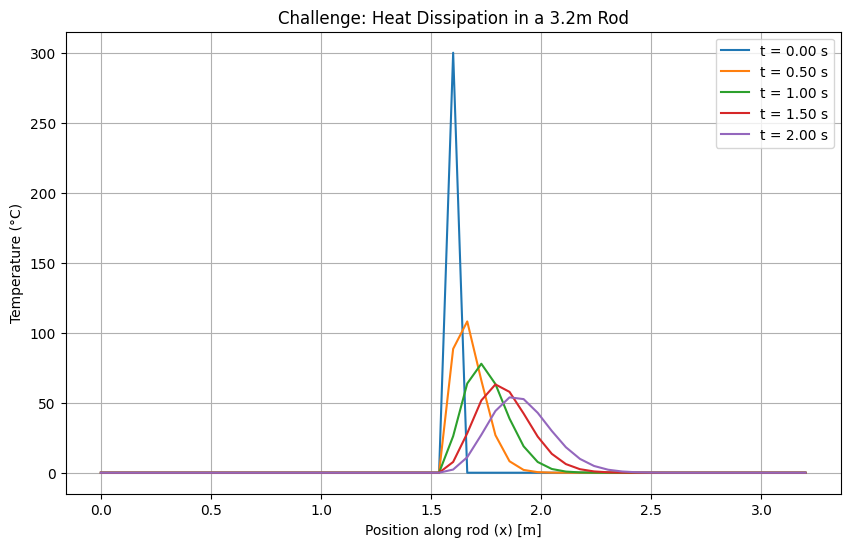

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Initialize MODIFIED Parameters ---
L = 3.2           # New Length of the rod (meters)
T = 2.0           # New Total simulation time (seconds)
nx = 51           # Number of spatial grid points (odd for a center)
# nt must be adjusted for stability. Let's start with a high value.
nt = 8000
alpha = 0.01      # Thermal diffusivity

# --- 2. Discretize the Domain ---
dx = L / (nx - 1)
dt = T / nt

# --- 3. Check Stability Condition ---
r = alpha * dt / dx**2
print(f"--- Challenge Parameters ---")
print(f"Rod Length L = {L} m")
print(f"Space step dx = {dx:.4f} m")
print(f"Time step dt = {dt:.6f} s")
print(f"Stability parameter r = {r:.4f}")

if r > 0.5:
    required_nt = (alpha * T * (nx - 1)**2) / (0.5 * L**2)
    print(f"\n--- WARNING: STABILITY FAILED (r > 0.5) ---")
    print(f"With nx={nx}, you need at least nt = {int(np.ceil(required_nt))} to achieve stability.")
else:
    print("\nStability condition r <= 0.5 is satisfied.")


# --- 4. Set Initial and Boundary Conditions ---
x = np.linspace(0, L, nx)
u = np.zeros(nx)
# Set the new initial temperature pulse at the center
u[int((nx - 1) / 2)] = 300.0

# --- 5. & 6. Time-stepping and Output ---
u_snapshots = [u.copy()]
snapshot_interval = nt // 4 # Store 4 snapshots over the total time

for n in range(nt):
    u_old = u.copy()
    for i in range(1, nx - 1):
        u[i] = u_old[i] + r * (u_old[i] + u_old[i-1] - 2*u_old[i])

    if (n + 1) % snapshot_interval == 0:
        u_snapshots.append(u.copy())

# --- Plotting the results ---
plt.figure(figsize=(10, 6))
for i, u_snap in enumerate(u_snapshots):
    time = i * snapshot_interval * dt
    # The first plot is the initial condition at t=0
    if i == 0:
        time = 0.0
    plt.plot(x, u_snap, label=f't = {time:.2f} s')

plt.xlabel('Position along rod (x) [m]')
plt.ylabel('Temperature (°C)')
plt.title('Challenge: Heat Dissipation in a 3.2m Rod')
plt.legend()
plt.grid(True)
plt.show()

# 3D visualization of the solution


--- Stability Check ---
r = 0.0006
✅ Stability condition r <= 0.5 is satisfied


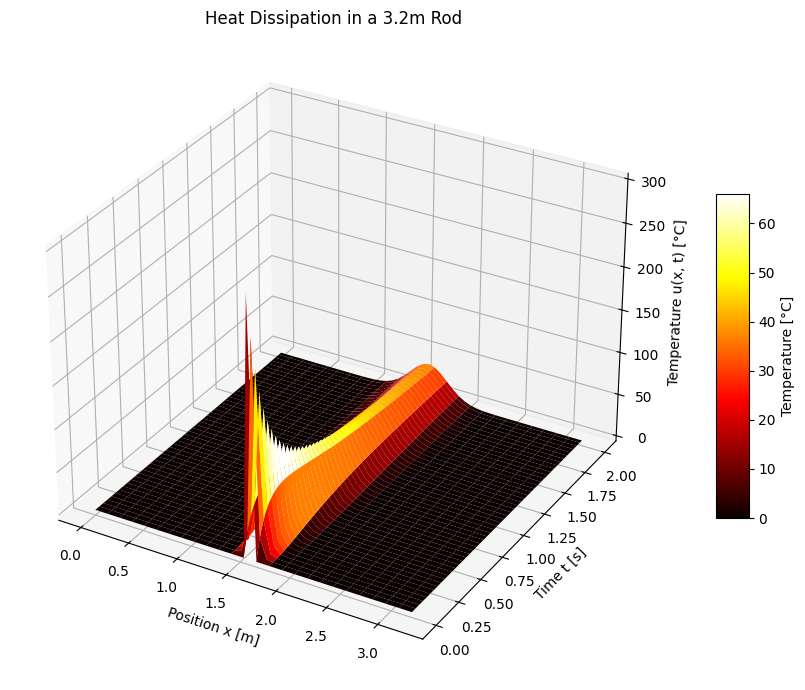

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Initialize MODIFIED Parameters ---
L = 3.2           # Length of the rod (meters)
T = 2.0           # Total simulation time (seconds)
nx = 51           # Number of spatial grid points (odd for center)
nt = 8000         # Number of time steps (ensures stability)
alpha = 0.01      # Thermal diffusivity

# --- 2. Discretize the Domain ---
dx = L / (nx - 1)
dt = T / nt
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt + 1)

# --- 3. Stability Check ---
r = alpha * dt / dx**2
print(f"--- Stability Check ---")
print(f"r = {r:.4f}")
if r > 0.5:
    print("⚠️ WARNING: Stability condition not met (r > 0.5)")
else:
    print("✅ Stability condition r <= 0.5 is satisfied")

# --- 4. Initial & Boundary Conditions ---
u = np.zeros(nx)
u[int((nx - 1) / 2)] = 300.0  # Pulse at center
u_all = np.zeros((nt + 1, nx))  # For storing the whole time evolution
u_all[0, :] = u.copy()

# --- 5. Time-Stepping ---
for n in range(1, nt + 1):
    u_new = u.copy()
    for i in range(1, nx - 1):
        u_new[i] = u[i] + r * (u[i+1] + u[i-1] - 2*u[i])
    u = u_new
    u_all[n, :] = u.copy()

# --- 6. 3D Surface Plot ---
X, T_grid = np.meshgrid(x, t)
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T_grid, u_all, cmap='hot', edgecolor='none')
ax.set_title("Heat Dissipation in a 3.2m Rod")
ax.set_xlabel("Position x [m]")
ax.set_ylabel("Time t [s]")
ax.set_zlabel("Temperature u(x, t) [°C]")
fig.colorbar(surf, shrink=0.5, aspect=10, label="Temperature [°C]")
plt.tight_layout()
plt.show()